# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import scipy.stats
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [15]:
# Is the distribution of temperatures normal?
scipy.stats.normaltest(df.temperature, axis=0, nan_policy='omit')

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

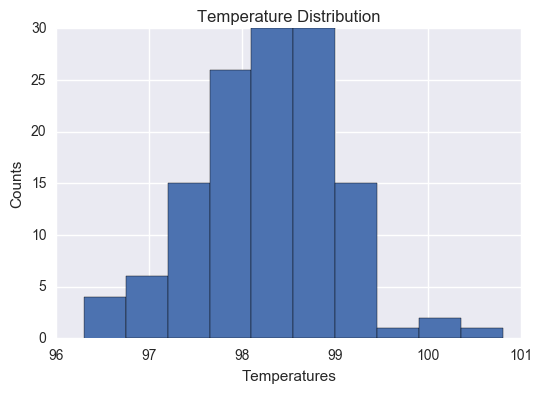

In [16]:
# pvalue of normal test > 0.05 distribution not normal
# visualize with histogram 

plt.hist(df.temperature)
plt.title('Temperature Distribution')
plt.xlabel('Temperatures')
plt.ylabel('Counts')

In [17]:
# histogram is not symmetrical - prime characteristic of normal distribution
# is the sample size large?

print('Sample Size: ' + str(len(df)))

Sample Size: 130


In [20]:
# 130 observations, not small but not very large
# each observation appears to be from separate individual - observations are independent
# Is the true population mean 98.6?

sample_mean = df.temperature.mean()
print('Sample Mean: ' + str(sample_mean))

Sample Mean: 98.24923076923078


In [22]:
# Sample mean is 98.2
# Would use a one sample test because data is made up of only one sample group
# If there were two sample groups such as one for males and one for females then would use two sample test
# Use z-statistic since sample size > 30

sample_std = df.temperature.std()
z_stat = (sample_mean - 98.6) / (sample_std / np.sqrt(130))
print('Z-stat: ' + str(z_stat))

Z-stat: -5.45482329236


In [23]:
# calculate t-statistic

t_stat = (sample_mean - 98.6) / (sample_std / np.sqrt(130))
print('T-stat: ' + str(t_stat))

T-stat: -5.45482329236


In [28]:
# calculated t-statistic is the same - however there are no negative t-scores
# at what temperature would we consider someone's temperature to be abnormal?
# compute margin of error and confidence interval
# 95% confidence interval - two tailed test: z-score at 97.5% = 1.96

d = 1.96 * (sample_std / np.sqrt(130))
lower_bound = sample_mean - d
upper_bound = sample_mean + d

print('95% confident that the real population mean is between ', lower_bound, ' and ', + upper_bound)

95% confident that the real population mean is between  98.1231941122  and  98.3752674262


In other words we are 95% confident that the true population mean is not 98.6 degrees F.

In [29]:
# is there a significant difference between males and females in normal temperature?
# Difference of Two Means Test
# Null hypothesis: the difference of mean temperature between males and females = 0
# hypothesis: there the difference of mean temperature between males and females > 0
# significance level: 5%

males = df[df.gender == 'M']
females = df[df.gender == 'F']

In [31]:
male_mean = males.temperature.mean()
print('Male Sample Mean: ' + str(male_mean))

Male Sample Mean: 98.1046153846154


In [32]:
female_mean = females.temperature.mean()
print('Female Sample Mean: ' + str(female_mean))

Female Sample Mean: 98.39384615384613


In [35]:
difference_of_means = male_mean - female_mean
print('Difference of Means: ' + str(difference_of_means))

Difference of Means: -0.289230769230727


In [39]:
std_x1_x2 = np.sqrt((males.temperature.var()/len(males)) + (females.temperature.var()/len(females)))

# 95% confidence level for two tailed test: z-score = -1.96
critical_value = -1.96 * std_x1_x2
print('Critical value: ' + str(critical_value))

Critical value: -0.248045742823


Assuming that the null hypothesis is correct: there is a only a 5% chance that the difference is means is higher than 0.248. The difference of means is 0.289 - we reject the null hypothesis.

In other words the probability that the difference of means between male and female temperatures is less than 5%.

There is a statistically significant difference between males and females in normal temperatures.